8/8 Pallets 80 x 120 cm | 2/2 Pallets 100 x 120 cm


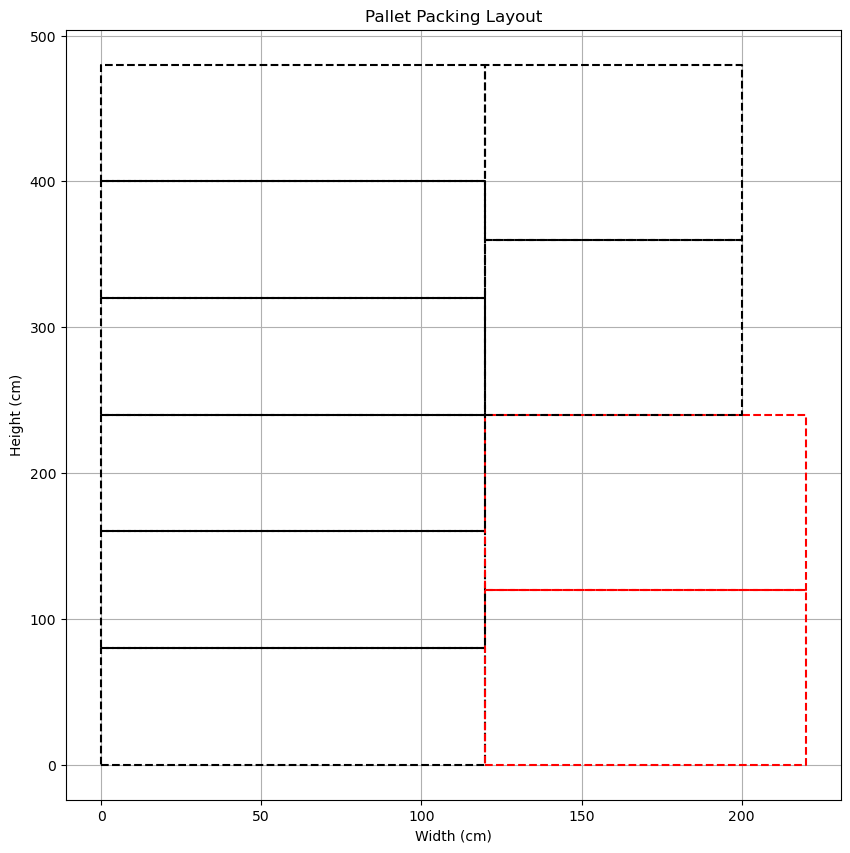

In [5]:
import matplotlib.pyplot as plt
from rectpack import newPacker
import rectpack.packer as packer

# Function to plot the packing solution
def plot_solution(all_rects, pal_812, pal_1012):
    plt.figure(figsize=(10, 10))
    
    # Loop through all rectangles and plot them
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x + w, x + w, x, x
        y1, y2, y3, y4, y5 = y, y, y + h, y + h, y

        # Determine the rectangle type and assign color
        if sorted([w, h]) == sorted(pal_812):  # Pallet 80 x 120 cm
            color = '--k'  # Black dashed
        elif sorted([w, h]) == sorted(pal_1012):  # Pallet 100 x 120 cm
            color = '--r'  # Red dashed
        else:
            color = '--b'  # Fallback color (optional)

        plt.plot([x1, x2, x3, x4, x5], [y1, y2, y3, y4, y5], color)
    
    plt.title("Pallet Packing Layout")
    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")
    plt.grid(True)
    plt.show()

# Solver function for packing
def solver(n_812, n_1012, bins):
    # Define pallet dimensions
    pal_812 = [80, 120]  # 80 x 120 cm
    pal_1012 = [100, 120]  # 100 x 120 cm

    # Create a list of rectangles to pack
    rectangles = [pal_812 for _ in range(n_812)] + [pal_1012 for _ in range(n_1012)]

    # Initialize the Packer
    pack = newPacker(mode=packer.PackingMode.Offline, bin_algo=packer.PackingBin.Global, rotation=True)

    # Add rectangles to the packer
    for r in rectangles:
        pack.add_rect(*r)

    # Add bins to the packer (container dimensions)
    for b in bins:
        pack.add_bin(*b)

    # Perform packing
    pack.pack()

    # Retrieve the full list of rectangles packed
    all_rects = pack.rect_list()

    # Count pallets by type
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]
    p_812 = all_pals.count(sorted(pal_812))
    p_1012 = all_pals.count(sorted(pal_1012))
    print("{:,}/{:,} Pallets 80 x 120 cm | {:,}/{:,} Pallets 100 x 120 cm".format(p_812, n_812, p_1012, n_1012))

    return all_rects, pal_812, pal_1012

# Main program
if __name__ == "__main__":
    # Define the number of pallets
    n_812 =  8 # Number of 80 x 120 cm pallets
    n_1012 = 2  # Number of 100 x 120 cm pallets

    # Define the container dimensions
    bins20 = [(236, 595)]  # 20-ft container (236 x 595 cm)
    bins = bins20  # Select container

    # Solve the packing problem
    all_rects, pal_812, pal_1012 = solver(n_812, n_1012, bins)

    # Plot the solution
    plot_solution(all_rects, pal_812, pal_1012)


In [2]:
n_812 = 3
n_1012 = 2
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects, pal_812, pal_1012)

3/3 Pallets 80 x 120 cm | 2/2 Pallets 100 x 120 cm


ValueError: too many values to unpack (expected 2)